In [1]:
import pandas as pd
import numpy as np

from scipy import stats
from sympy import *
from statsmodels.stats.proportion import proportions_ztest

import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.4f}'.format

import warnings
warnings.filterwarnings("ignore")

# Коэффициент корреляции Спирмена

$$r_{xy} = 1 - \frac{6 \cdot \sum{d_i^2}}{n^3 - n}$$

$$T_{набл} = \frac{r_{xy}}{\sqrt{1-r_{xy}^2}} \cdot \sqrt{n-2}$$

$$T \sim t(df=n-2)$$

## Задача 1


При дегустации 10 сортов продукции двумя специалистами были получены следующие оценки:

|1|2|3|4|5|6|7|8|9|10|11|
|---|---|---|---|---|---|---|---|---|---|---|
|I|3|5|10|5|4|2|3|2|1|7|
|II|5|1|9|4|3|1|2|7|8|5|

Используя различные показатели тесноты связи установить, есть ли связь между оценками первого и второго курса.

In [2]:
df = pd.DataFrame([[3, 5, 10, 5, 4, 2, 3, 2, 1, 7], 
                   [5, 1, 9, 4, 3, 1, 2, 7, 8, 5]], index=['I', 'II']).T

df

,I,II
0,3,5
1,5,1
2,10,9
3,5,4
4,4,3
5,2,1
6,3,2
7,2,7
8,1,8
9,7,5


#### Расчет вручную

In [3]:
df['rank_I'] = stats.rankdata(df['I'])
df['rank_II'] = stats.rankdata(df['II'])
df['diff'] = abs(df['rank_I'] - df['rank_II'])

In [4]:
df

,I,II,rank_I,rank_II,diff
0,3,5,4.5000,6.5000,2.0000
1,5,1,7.5000,1.5000,6.0000
2,10,9,10.0000,10.0000,0.0000
3,5,4,7.5000,5.0000,2.5000
4,4,3,6.0000,4.0000,2.0000
5,2,1,2.5000,1.5000,1.0000
6,3,2,4.5000,3.0000,1.5000
7,2,7,2.5000,8.0000,5.5000
8,1,8,1.0000,9.0000,8.0000
9,7,5,9.0000,6.5000,2.5000


In [25]:
n = df.shape[0]

r = 1 - ((6 * sum(df['diff']**2)) / (n**3 - n))

r

0.06666666666666665

In [27]:
T = r / np.sqrt(1 - r**2) * (np.sqrt(n-2))

T

0.1889822365046136

In [30]:
p_value = stats.t.sf(T, df=n-2)*2

p_value

0.8548130882487426

#### Расчет пакетом stats

In [45]:
stats.spearmanr(df, alternative='two-sided')

SpearmanrResult(correlation=0.052307939919828295, pvalue=0.8858889446081174)

$p-value$ выше $\alpha=0.05$. Следовательно, не можем отвергнуть нулевую гипотезу. **Cвязь между оценками первого и второго курса отсутствует**. 

## Задача 2

Исходные данные: X (число посетителей в сутки), Y (усредненная позиция сайта в поисковой системе).

В таблице представлены значения признаков X и Y: 

|№|X|Y|
|---|---|---|
|1|500|5.4|
|2|790|4.2|
|3|870|4.0|
|4|1500|3.4|
|5|2300|2.5|
|6|5600|1.0|
|7|100|6.1|
|8|20|8.2|
|9|5|14.6|


In [46]:
df = pd.DataFrame({'X':[500, 790, 870, 1500, 2300, 5600, 100, 20, 5], 
                   'Y':[5.4, 4.2, 4.0, 3.4, 2.5, 1.0, 6.1, 8.2, 14.6]})

df

,X,Y
0,500,5.4000
1,790,4.2000
2,870,4.0000
3,1500,3.4000
4,2300,2.5000
5,5600,1.0000
6,100,6.1000
7,20,8.2000
8,5,14.6000


#### Расчет вручную 

In [37]:
df['rank_X'] = stats.rankdata(df['X'])
df['rank_Y'] = stats.rankdata(df['Y'])
df['diff'] = abs(df['rank_X'] - df['rank_Y'])

In [38]:
df

,X,Y,rank_X,rank_Y,diff
0,500,5.4000,4.0000,6.0000,2.0000
1,790,4.2000,5.0000,5.0000,0.0000
2,870,4.0000,6.0000,4.0000,2.0000
3,1500,3.4000,7.0000,3.0000,4.0000
4,2300,2.5000,8.0000,2.0000,6.0000
5,5600,1.0000,9.0000,1.0000,8.0000
6,100,6.1000,3.0000,7.0000,4.0000
7,20,8.2000,2.0000,8.0000,6.0000
8,5,14.6000,1.0000,9.0000,8.0000


In [34]:
n = df.shape[0]

r = 1 - ((6 * sum(df['diff']**2)) / (n**3 - n))

r

-1.0

In [40]:
T = r / np.sqrt(1 - r**2) * (np.sqrt(n-2))

T

-inf

In [42]:
p_value = stats.t.cdf(T, df=n-2)*2

p_value

0.0

#### Рассчет пакетом stats

In [47]:
stats.spearmanr(df, alternative='two-sided')

SpearmanrResult(correlation=-1.0, pvalue=0.0)

$p-value$ ниже $\alpha=0.05$. Следовательно, не можем принять нулевую гипотезу. **Между количеством посещений и позицией сайта сильная отрицательная корреляция**. 

# Коэффициент корреляции Пирсона

$$r_{xy} = \frac{\overline{x \cdot y} - \overline{x} \cdot \overline{y}}{\sigma_x \cdot \sigma_y}$$

$$T_{набл} = \frac{r_{xy}}{\sqrt{1-r_{xy}^2}} \cdot \sqrt{n-2}$$

$$T \sim t(df=n-2)$$

## Задача 1

|Номера испытуемых|1|2|3|4|
|---|---|---|---|---|
|Стаж(в мес.)|32|15|16|18|
|Время решения (в мин.)|12|24|23|21|

In [74]:
df = pd.DataFrame([[32, 15, 16, 18],
                   [12, 24, 23, 21]], index=['Стаж', 'Время']).T

df

,Стаж,Время
0,32,12
1,15,24
2,16,23
3,18,21


#### Рассчет вручную 

In [65]:
avg_x = df['Стаж'].mean()
avg_y = df['Время'].mean()

n = df.shape[0]

avg_xy = sum(df['Стаж'] * df['Время'])/n

var_x = np.mean(sum(df['Стаж']**2/n)) - avg_x**2
var_y = np.mean(sum(df['Время']**2/n)) - avg_y**2

In [69]:
r = (avg_xy - avg_x * avg_y) / np.sqrt(var_x * var_y)
r

-0.9974212519239557

In [70]:
T = r / np.sqrt(1 - r**2) * (np.sqrt(n-2))

T

-19.654152596479697

In [73]:
p_value = stats.t.cdf(T, df=n-2)*2

p_value

0.002578748076044312

#### Расчет пакетом stats

In [78]:
stats.pearsonr(x=df['Стаж'], y=df['Время'], alternative='two-sided')

PearsonRResult(statistic=-0.9974212519239558, pvalue=0.0025787480760441905)

$p-value$ ниже $\alpha=0.05$. Следовательно, не можем принять нулевую гипотезу. **Между стажем и временем решения задач сильная отрицательная корреляция**. 

## Задача 2

Исходные данные: X (число посетителей в сутки), Y (усредненная позиция сайта в поисковой системе).

В таблице представлены значения признаков X и Y: 

|№|X|Y|
|---|---|---|
|1|500|5.4|
|2|790|4.2|
|3|870|4.0|
|4|1500|3.4|
|5|2300|2.5|
|6|5600|1.0|
|7|100|6.1|
|8|20|8.2|
|9|5|14.6|

In [6]:
df = pd.DataFrame({'X':[500, 790, 870, 1500, 2300, 5600, 100, 20, 5], 
                   'Y':[5.4, 4.2, 4.0, 3.4, 2.5, 1.0, 6.1, 8.2, 14.6]})

df

,X,Y
0,500,5.4000
1,790,4.2000
2,870,4.0000
3,1500,3.4000
4,2300,2.5000
5,5600,1.0000
6,100,6.1000
7,20,8.2000
8,5,14.6000


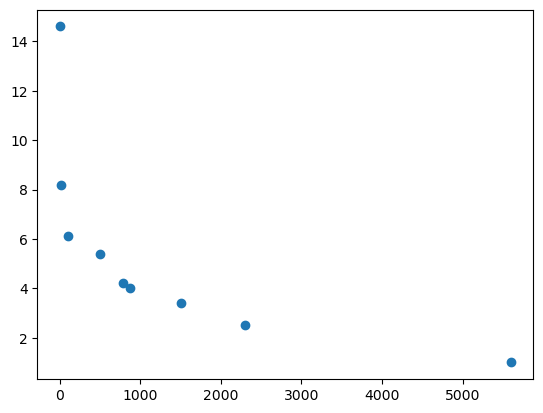

In [15]:

plt.scatter(df['X'], df['Y'])


plt.show()

#### Рассчет вручную 

In [80]:
avg_x = df['X'].mean()
avg_y = df['Y'].mean()

n = df.shape[0]

avg_xy = sum(df['X'] * df['Y'])/n

var_x = np.mean(sum(df['X']**2/n)) - avg_x**2
var_y = np.mean(sum(df['Y']**2/n)) - avg_y**2

In [81]:
r = (avg_xy - avg_x * avg_y) / np.sqrt(var_x * var_y)
r

-0.6551184791652499

In [82]:
T = r / np.sqrt(1 - r**2) * (np.sqrt(n-2))

T

-2.2941370758621185

In [83]:
p_value = stats.t.cdf(T, df=n-2)*2

p_value

0.05546828066520204

#### Расчет пакетом stats

In [84]:
stats.pearsonr(x=df['X'], y=df['Y'], alternative='two-sided')

PearsonRResult(statistic=-0.6551184791652501, pvalue=0.055468280665201965)

$p-value$ dsit $\alpha=0.05$. Следовательно, не можем отвергнуть нулевую гипотезу. **Между количеством посещений и позицией сайта отсутствует корреляция**. 